# Table of content
- [Load Data into Notebook](#loaddata)
- [Prepare data for wordcloud](#prepare-data)
    - [Positive Wordcloud Visualization](#wordcloud-positive)
    - [Negative Wordcloud Visualization](#wordcloud-negative)
- [Scattertext](#scattertext)
- [Elasticsearch](#elasticsearch)

In [94]:
import pandas as pd
from sqlalchemy import create_engine
import requests

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

<a id="loaddata"></a>
# Load Data into notebook

Load data from postgres into Jupyter Notebook

In [86]:
db_credentials = {
    "host": "localhost",
    "port": "54321",
    "database": "twitter_db",
    "user": "twitter_db_user",
    "password": "db_password"
}

In [87]:
db_uri = f"postgres+psycopg2://{db_credentials['user']}:{db_credentials['password']}@{db_credentials['host']}:{db_credentials['port']}/{db_credentials['database']}"

In [88]:
engine = create_engine(db_uri, echo=True)

In [89]:
df = pd.read_sql("tweet", con=engine)

2021-06-13 21:58:47,306 INFO sqlalchemy.engine.base.Engine select version()
2021-06-13 21:58:47,307 INFO sqlalchemy.engine.base.Engine {}
2021-06-13 21:58:47,313 INFO sqlalchemy.engine.base.Engine select current_schema()
2021-06-13 21:58:47,314 INFO sqlalchemy.engine.base.Engine {}
2021-06-13 21:58:47,321 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-06-13 21:58:47,322 INFO sqlalchemy.engine.base.Engine {}
2021-06-13 21:58:47,326 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-06-13 21:58:47,327 INFO sqlalchemy.engine.base.Engine {}
2021-06-13 21:58:47,329 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2021-06-13 21:58:47,330 INFO sqlalchemy.engine.base.Engine {}
2021-06-13 21:58:47,336 INFO sqlalchemy.engine.base.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
20

2021-06-13 21:58:47,446 INFO sqlalchemy.engine.base.Engine {'table_oid': 16385}
2021-06-13 21:58:47,453 INFO sqlalchemy.engine.base.OptionEngine SELECT tweet.id, tweet.created_at, tweet.text, tweet.feedback_type, tweet.language 
FROM tweet
2021-06-13 21:58:47,453 INFO sqlalchemy.engine.base.OptionEngine {}


In [90]:
df = df[df["language"] == "en"]

In [91]:
df.head()

,id,created_at,text,feedback_type,language
0,1404155072326606856,2021-06-13 19:13:51,RT @leongibi: Franz Kafka’nın da dediği gibi ‘...,negative,en
1,1404155074847424513,2021-06-13 19:13:52,@lukeredpath I think it’s quite interesting ac...,negative,en
2,1404155082078310408,2021-06-13 19:13:54,RT @zizopixels_: 🔥DevOps methodology & roadmap...,positive,en
3,1404155082917175302,2021-06-13 19:13:54,Shit'beuh 👇🌿\nhttps://t.co/YFMLOUyzIT\n #paris...,negative,en
4,1404155083340894208,2021-06-13 19:13:54,@ayaelgebeely Sorry for the inconvenient reply...,positive,en


<a id="prepare-data"></a>
# Prepare Data
Split data into positive and negative datasets & join text to a positive / negative blob text for the upcomming wordcloud

In [7]:
positive_df = df[df["feedback_type"] == "positive"]
negative_df = df[df["feedback_type"] == "negative"]

In [17]:
positive_text = ". ".join(positive_df["text"].tolist()).replace("\n", " ").replace("\\", "")
negative_text = ". ".join(negative_df["text"].tolist()).replace("\n", " ").replace("\\", "")

<a id="wordcloud-positive"></a>
## Positive Word Visualization

In [29]:
poitive_wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color='blue',
    collocations=False,
    stopwords=STOPWORDS
)
poitive_wordcloud.generate(positive_text)

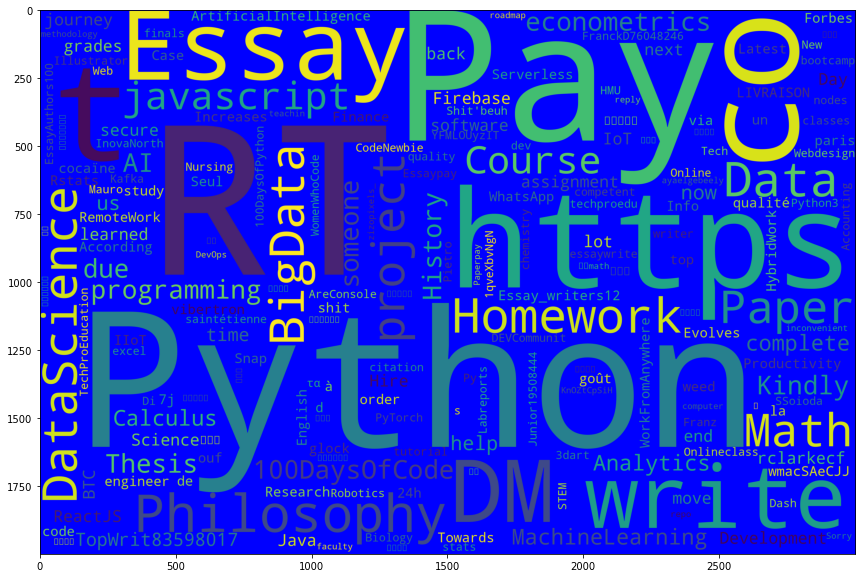

In [28]:
plt.figure(figsize=(20, 10))
plt.imshow(poitive_wordcloud)

<a id="wordcloud-negative"></a>
## Negative Word Visualization

In [36]:
negative_wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color='red',
    collocations=False,
    stopwords=STOPWORDS
)
negative_wordcloud.generate(negative_text)

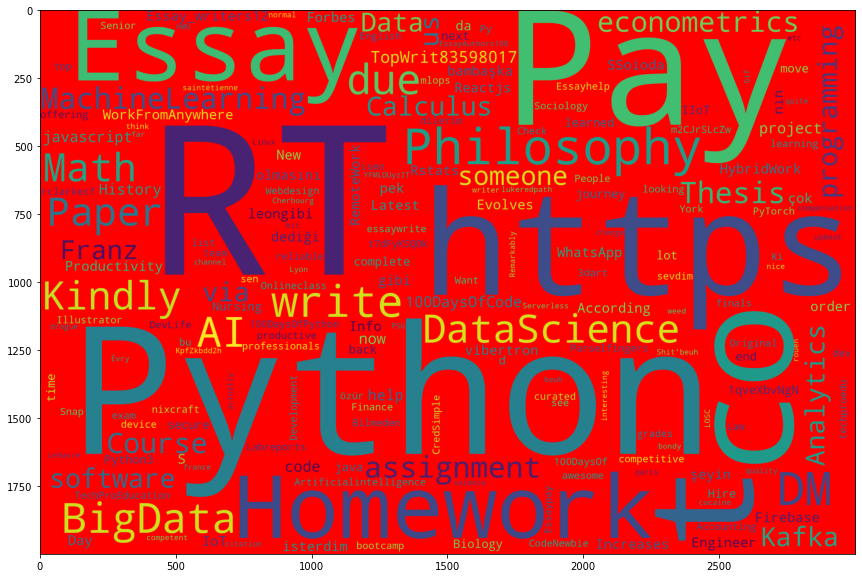

In [37]:
plt.figure(figsize=(20, 10))
plt.imshow(negative_wordcloud)

<a id="scattertext"></a>
## Scattertext

Scattertext will create an additional overview to compare texts for positive and negative Values direct next to each other. I like it more ;-)

But it's a bit hacky. An HTML file will be generated and stored in files directory. You need to open it seperat. Sorry for that

In [72]:
import scattertext as st

In [73]:
scatter_df = df[df["language"] == "en"]

In [74]:
scatter_df = scatter_df.assign(parse = lambda df: df.text.apply(st.whitespace_nlp_with_sentences))

In [75]:
scatter_df.head()

,id,created_at,text,feedback_type,language,parse
0,1404155072326606856,2021-06-13 19:13:51,RT @leongibi: Franz Kafka’nın da dediği gibi ‘...,negative,en,"(rt, @, leongibi, :, franz, kafka, ’, nın, da,..."
1,1404155074847424513,2021-06-13 19:13:52,@lukeredpath I think it’s quite interesting ac...,negative,en,"(@, lukeredpath, i, think, it, ’, s, quite, in..."
2,1404155082078310408,2021-06-13 19:13:54,RT @zizopixels_: 🔥DevOps methodology & roadmap...,positive,en,"(rt, @, zizopixels_, :, 🔥, devops, methodology..."
3,1404155082917175302,2021-06-13 19:13:54,Shit'beuh 👇🌿\nhttps://t.co/YFMLOUyzIT\n #paris...,negative,en,"(shit, ', beuh, 👇, 🌿, https, :, /, /, t, ., co..."
4,1404155083340894208,2021-06-13 19:13:54,@ayaelgebeely Sorry for the inconvenient reply...,positive,en,"(@, ayaelgebeely, sorry, for, the, inconvenien..."


In [78]:
corpus = st.CorpusFromParsedDocuments(
    scatter_df, category_col='feedback_type', parsed_col='parse'
).build().get_unigram_corpus().compact(st.AssociationCompactor(2000))

In [82]:
html = st.produce_scattertext_explorer(
    corpus,
    category='positive', category_name='Positive', not_category_name='Negative',
    minimum_term_frequency=0, pmi_threshold_coefficient=0,
    width_in_pixels=1000, metadata=corpus.get_df()['id'],
    transform=st.Scalers.dense_rank
)

In [84]:
open('./feedback-visualization.html', 'w').write(html)

555397

<a id="elasticsearch"></a>
# Elastic Search Connection

this is a raw interface for Elastic Search requests. If you find an interesting word, just paste it in and get all texts back where this word was included.

This will gives you a context about the words meaning in positve or negative.

In [146]:
def query_elasticsearch(keyword: str):
    url = "http://localhost:9200/twitter-etl/_search"
    body = {
        "query": {
            "match": {
                "Text": {
                    "query": keyword
                }
            }
        }
    }
    response = requests.post(url=url, json=body)
    data = response.json()

    return [
        {"id": hit["_source"]["Id"], "body": hit["_source"]["Text"]}
        for hit in data["hits"]["hits"]
    ]

In [147]:
keyword = "python"

In [148]:
q = query_elasticsearch(keyword)

In [149]:
q

[{'id': 1404155300052078595,
  'body': 'RT @NishantGour13: 📢 Generate QR code With python!\n\n#python #python3 #pythonprogramming #pythonproject\n https://t.co/TDJa6uwY77'},
 {'id': 1404155153612259330,
  'body': 'RT @nixcraft: Parselfingers https://t.co/t7dFyKSQOk #Python #DevLife https://t.co/m2CJrSLcZw'},
 {'id': 1404155147077443586,
  'body': 'RT @nixcraft: Parselfingers https://t.co/t7dFyKSQOk #Python #DevLife https://t.co/m2CJrSLcZw'},
 {'id': 1404155131453755397,
  'body': 'RT @sonu_monika: Computational Evolution with #Robotics. #BigData #Analytics #DataScience #AI #MachineLearning #IoT #IIoT #PyTorch #Python…'},
 {'id': 1404155174923517952,
  'body': 'RT @AreConsole: #python #100DaysOfCode #3dart #AI #100DaysOfPython #code #dev #BigData #CodeNewbie #data #DataScience #Python3 #DEVCommunit…'},
 {'id': 1404155174957031434,
  'body': 'RT @AreConsole: #python #100DaysOfCode #3dart #AI #100DaysOfPython #code #dev #BigData #CodeNewbie #data #DataScience #Python3 #DEVCommunit…'},
 {'